In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
max_features = 10000  # Only include top 10,000 words in the vocabulary
maxlen = 500  # Cut off each review after 500 words
batch_size = 32

In [3]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
X_train.shape, X_test.shape

((25000,), (25000,))

In [0]:
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [6]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length = maxlen))
model.add(layers.Dropout(0.2))
model.add(layers.CuDNNLSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs= 15, batch_size=512, validation_split= 0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/15





20000/20000 [==============================] - 15s 765us/step - loss: 0.6595 - acc: 0.6227 - val_loss: 0.5230 - val_acc: 0.7652
Epoch 2/15
20000/20000 [==============================] - 2s 83us/step - loss: 0.4320 - acc: 0.8193 - val_loss: 0.3809 - val_acc: 0.8460
Epoch 3/15
20000/20000 [==============================] - 2s 83us/step - loss: 0.2921 - acc: 0.8889 - val_loss: 0.3522 - val_acc: 0.8466
Epoch 4/15
20000/20000 [==============================] - 2s 83us/step - loss: 0.2321 - acc: 0.9162 - val_loss: 0.3014 - val_acc: 0.8768
Epoch 5/15
20000/20000 [==============================] - 2s 84us/step - loss: 0.1807 - acc: 0.9393 - val_loss: 0.3066 - val_acc: 0.8844
Epoch 6/15
20000/20000 [==============================] - 2s 83us/step - loss: 0.1495 - acc: 0.9527 - val_loss: 0.3229 - val_acc: 0.8868
Epoch 7/15
20000/20000 

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

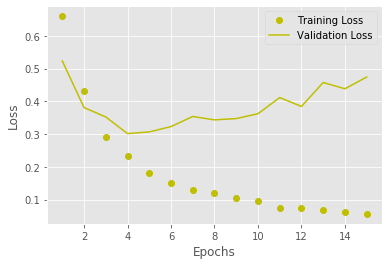

In [10]:
epochs = range(1, 16)

plt.plot(epochs, loss, 'yo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'y', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, Y_test)

25000/25000 [==============================] - 6s 241us/step


[0.5472562632369995, 0.84592]